# LSTM for Bonn University Epilepsy Dataset

A | B | C | D | E
--- | --- | --- | --- | ---
*Non-Epileptic* | *Non-Epileptic* | `Epileptic` | `Epileptic` | `Epileptic`
Eyes Opened | Eyes Closed | Interictal | Interictal | Ictal

In [6]:
# Will enable Google Colab specific code. If you run locally, put it to False.
GColab = True

if GColab:
  !wget http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/Z.zip  # Set A
  !wget http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/O.zip  # Set B
  !wget http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/N.zip  # Set C
  !wget http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/F.zip  # Set D
  !wget http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/S.zip  # Set E

  !unzip Z.zip -d 'Set A'
  !unzip O.zip -d 'Set B'
  !unzip N.zip -d 'Set C'
  !unzip F.zip -d 'Set D'
  !unzip S.zip -d 'Set E'

--2018-07-14 07:34:57--  http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/Z.zip
Resolving epileptologie-bonn.de (epileptologie-bonn.de)... 83.169.36.208
Connecting to epileptologie-bonn.de (epileptologie-bonn.de)|83.169.36.208|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 578047 (564K) [application/zip]
Saving to: ‘Z.zip’

Z.zip               100%[===================>] 564.50K   446KB/s    in 1.3s    

2018-07-14 07:34:59 (446 KB/s) - ‘Z.zip’ saved [578047/578047]

--2018-07-14 07:35:00--  http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/O.zip
Resolving epileptologie-bonn.de (epileptologie-bonn.de)... 83.169.36.208
Connecting to epileptologie-bonn.de (epileptologie-bonn.de)|83.169.36.208|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 625970 (611K) [application/zip]
Saving to: ‘O.zip’

O.zip               100%[===================>] 611.30K   466KB/s    in 1.3s    

2018-07-14 07:35:02 (466 KB/s) - ‘O.zip’ saved [62

Archive:  F.zip
  inflating: Set D/F100.txt          
  inflating: Set D/F002.txt          
  inflating: Set D/F003.txt          
  inflating: Set D/F004.txt          
  inflating: Set D/F005.txt          
  inflating: Set D/F006.txt          
  inflating: Set D/F007.txt          
  inflating: Set D/F008.txt          
  inflating: Set D/F009.txt          
  inflating: Set D/F010.txt          
  inflating: Set D/F011.txt          
  inflating: Set D/F012.txt          
  inflating: Set D/F013.txt          
  inflating: Set D/F014.txt          
  inflating: Set D/F015.txt          
  inflating: Set D/F016.txt          
  inflating: Set D/F017.txt          
  inflating: Set D/F018.txt          
  inflating: Set D/F019.txt          
  inflating: Set D/F020.txt          
  inflating: Set D/F021.txt          
  inflating: Set D/F022.txt          
  inflating: Set D/F023.txt          
  inflating: Set D/F024.txt          
  inflating: Set D/F025.txt          
  inflating: Set D/F026.txt       

In [0]:
import glob
import numpy as np
import matplotlib.pyplot as plt

In [22]:
if GColab:
  !pip install tqdm
  
import os
from tqdm import tqdm

if GColab:
  DATA_DIR_A = './Set A/'
  DATA_DIR_B = './Set B/'
  DATA_DIR_C = './Set C/'
  DATA_DIR_D = './Set D/'
  DATA_DIR_E = './Set E/'
else:
  DATA_DIR_A = '/Users/yannick/Cortex/HackerFest/Epilepsy/Bonn University/Set A/'
  DATA_DIR_B = '/Users/yannick/Cortex/HackerFest/Epilepsy/Bonn University/Set B/'
  DATA_DIR_C = '/Users/yannick/Cortex/HackerFest/Epilepsy/Bonn University/Set C/'
  DATA_DIR_D = '/Users/yannick/Cortex/HackerFest/Epilepsy/Bonn University/Set D/'
  DATA_DIR_E = '/Users/yannick/Cortex/HackerFest/Epilepsy/Bonn University/Set E/'
  
def load_data():
    data = []
    nbFiles = 0
    for fname in tqdm(os.listdir(DATA_DIR_A)):
        label = 0
        img = np.loadtxt(DATA_DIR_A + fname)
        data.append([img, np.array(label)])
        nbFiles+=1

    for fname in tqdm(os.listdir(DATA_DIR_B)):
        label = 0
        img = np.loadtxt(DATA_DIR_B + fname)
        data.append([img, np.array(label)])
        nbFiles+=1    
    
    for fname in tqdm(os.listdir(DATA_DIR_C)):
        label = 1
        img = np.loadtxt(DATA_DIR_C + fname)
        data.append([np.array(img), np.array(label)])
        nbFiles+=1

    for fname in tqdm(os.listdir(DATA_DIR_D)):
        label = 1
        img = np.loadtxt(DATA_DIR_D + fname)
        data.append([np.array(img), np.array(label)])
        nbFiles+=1

    for fname in tqdm(os.listdir(DATA_DIR_E)):
        label = 2
        img = np.loadtxt(DATA_DIR_E + fname)
        data.append([np.array(img), np.array(label)])
        nbFiles+=1
        
    return data


data = load_data()
print(len(data))

NameError: ignored

In [0]:
from sklearn.utils import shuffle
data = shuffle(data)

data_train = data[0:160]
data_test = data[160:200]

X_train = np.array([d[0] for d in data_train])
Y_train = np.array([d[1] for d in data_train])

X_test = np.array([d[0] for d in data_test])
Y_test = np.array([d[1] for d in data_test])

X_train.shape
    
X_train = X_train.reshape(X_train.shape[0], 4097, 1)
Y_train = Y_train.reshape(Y_train.shape[0], 1)

X_test = X_test.reshape(X_test.shape[0], 4097, 1)
Y_test = Y_test.reshape(Y_test.shape[0], 1)

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM

num_steps = 30
batch_size = 20
num_epochs = 50
hidden_size = 500
use_dropout=True

model = Sequential()
model.add(LSTM(64, input_shape=(4097,1)))
#model.add(LSTM(64, return_sequences=False))

model.add(Dropout(0.35))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['mae', 'acc'])

print(model.summary())

history = model.fit(X_train, Y_train, validation_split=0.2, batch_size=4, nb_epoch=20)
score = model.evaluate(X_test, Y_test, batch_size=4)

#checkpointer = ModelCheckpoint(filepath=data_path + '/model-{epoch:02d}.hdf5', verbose=1)


# 1 LSTM with 64 (4097,1)
# Adam, Binary_CrossEntropy, Batch Size 4, Epoch 20
# --> 99 - 100% Accuracy (A <-> E)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 64)                16896     
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
_________________________________________________________________
activation_6 (Activation)    (None, 1)                 0         
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 128 samples, validate on 32 samples
Epoch 1/20
128/128 [==============================] - 65s 511ms/step - loss: 0.6316 - mean_absolute_error: 0.4479 - acc: 0.6641 - val_loss: 0.4991 - val_mean_absolute_error: 0.3851 - val_acc: 0.9062
Epoch 2/20
128/128 [==============================] - 64s 497ms/step - loss: 0.4624 - mean_absolute_error: 0.3495 - acc: 0.8359 - val_loss: 0.3798 - val_mean_absolute_error: 0.3059 - val_acc: 0.9375
Epoch 3/20
128/128 [==============================] - 63s 491ms/step - loss: 0.4315 - mean_absolute_error: 0.3223 - acc: 0.8438 - val_loss: 0.3319 - val_mean_absolute_error: 0.2699 - val_acc: 0.9375
Epoch 4/20
128/128 [==============================] - 62s 486ms/step - loss: 0.3244 - mean_absolute_error: 0.2536 - acc: 0.9219 - val_loss: 0.2413 - val_mean_absolute_error: 0.2037 - val_acc: 0.9688
Epoch 5/20
128/128 [==============================] - 63s 489ms/step - loss: 0.2698 - mean_absolute_error: 0.2101 - acc: 0.9375 - val_loss: 0.2155 - val_mean_a

128/128 [==============================] - 62s 486ms/step - loss: 0.2276 - mean_absolute_error: 0.1808 - acc: 0.9375 - val_loss: 0.2028 - val_mean_absolute_error: 0.1650 - val_acc: 0.9062
Epoch 7/20
128/128 [==============================] - 63s 490ms/step - loss: 0.1938 - mean_absolute_error: 0.1547 - acc: 0.9531 - val_loss: 0.1225 - val_mean_absolute_error: 0.1083 - val_acc: 1.0000
Epoch 8/20
128/128 [==============================] - 63s 493ms/step - loss: 0.1399 - mean_absolute_error: 0.1187 - acc: 0.9922 - val_loss: 0.1064 - val_mean_absolute_error: 0.0864 - val_acc: 0.9688
Epoch 9/20
128/128 [==============================] - 63s 489ms/step - loss: 0.1156 - mean_absolute_error: 0.0883 - acc: 0.9844 - val_loss: 0.2811 - val_mean_absolute_error: 0.1528 - val_acc: 0.8750
Epoch 10/20
128/128 [==============================] - 63s 490ms/step - loss: 0.1346 - mean_absolute_error: 0.0828 - acc: 0.9766 - val_loss: 0.0841 - val_mean_absolute_error: 0.0636 - val_acc: 0.9688
Epoch 11/20
 56

128/128 [==============================] - 63s 490ms/step - loss: 0.0495 - mean_absolute_error: 0.0468 - acc: 1.0000 - val_loss: 0.0822 - val_mean_absolute_error: 0.0582 - val_acc: 0.9688
Epoch 12/20
128/128 [==============================] - 63s 489ms/step - loss: 0.0456 - mean_absolute_error: 0.0427 - acc: 1.0000 - val_loss: 0.0849 - val_mean_absolute_error: 0.0559 - val_acc: 0.9688
Epoch 13/20
128/128 [==============================] - 63s 491ms/step - loss: 0.0499 - mean_absolute_error: 0.0439 - acc: 0.9922 - val_loss: 0.0541 - val_mean_absolute_error: 0.0405 - val_acc: 0.9688
Epoch 14/20
128/128 [==============================] - 63s 489ms/step - loss: 0.0582 - mean_absolute_error: 0.0395 - acc: 0.9922 - val_loss: 0.2028 - val_mean_absolute_error: 0.0892 - val_acc: 0.9062
Epoch 15/20
128/128 [==============================] - 63s 490ms/step - loss: 0.0432 - mean_absolute_error: 0.0306 - acc: 0.9922 - val_loss: 0.0135 - val_mean_absolute_error: 0.0133 - val_acc: 1.0000
Epoch 16/20


128/128 [==============================] - 63s 491ms/step - loss: 0.0652 - mean_absolute_error: 0.0300 - acc: 0.9922 - val_loss: 0.0340 - val_mean_absolute_error: 0.0279 - val_acc: 1.0000
Epoch 17/20
128/128 [==============================] - 62s 488ms/step - loss: 0.0548 - mean_absolute_error: 0.0341 - acc: 0.9922 - val_loss: 0.0142 - val_mean_absolute_error: 0.0139 - val_acc: 1.0000
Epoch 18/20
128/128 [==============================] - 63s 493ms/step - loss: 0.0571 - mean_absolute_error: 0.0310 - acc: 0.9844 - val_loss: 0.0130 - val_mean_absolute_error: 0.0128 - val_acc: 1.0000
Epoch 19/20
128/128 [==============================] - 62s 487ms/step - loss: 0.0464 - mean_absolute_error: 0.0297 - acc: 0.9844 - val_loss: 0.0128 - val_mean_absolute_error: 0.0126 - val_acc: 1.0000
Epoch 20/20
40/40 [==============================] - 3s 65ms/step


dict_keys(['val_loss', 'val_mean_absolute_error', 'val_acc', 'loss', 'mean_absolute_error', 'acc'])


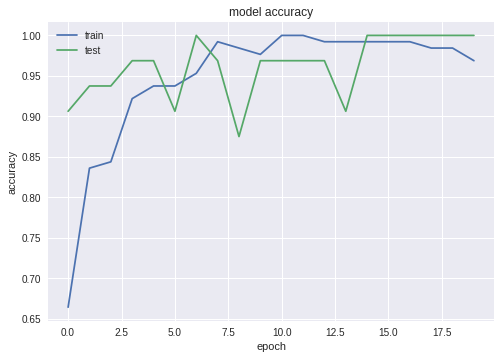

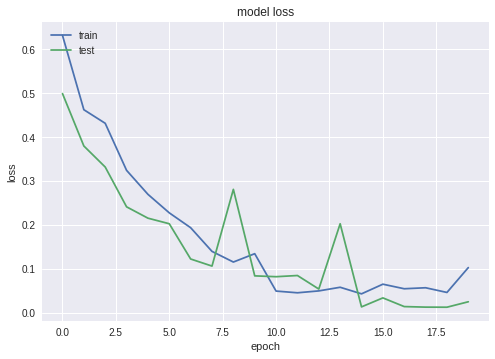

In [21]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()